## <div dir="rtl"> پاسخ تشریحی تسک نوترکیبی و LD

In [2]:
library('SciViews')
library ( 'ggplot2')
P = 0.1

 <div dir="rtl"> در این تسک فرض می‌کنیم نرخ نوترکیبی (P) برابر با ۰.۱ می‌باشد. ابتدا با توجه به فراوانی هر هاپلوتایپ فراوانی‌ ژنوتیپ‌های هر نسل را محاسبه می‌کنیم. برای این کار از جدولی که در تسک به شما داده شده است استفاده می‌کنیم. 

In [3]:
  rNumber = vector() 
  rNumber[1] = 0.2
  rNumber[2] = 0.3
  rNumber[3] = 0.4
  rNumber[4] = 0.1
  SUmrNumber = sum (rNumber)
  
  gAB0 = rNumber[1] / SUmrNumber
  gAb0 = rNumber[2] / SUmrNumber
  gaB0 = rNumber[3] / SUmrNumber
  gab0 = rNumber[4] / SUmrNumber
  
  SexHostGeneSpace = vector()  #shows frequencies of every genotypes in the  initial sexual host population
  SexHostGeneSpace[1] = gAB0 * gAB0 
  SexHostGeneSpace[2] = gAb0 * gAb0 
  SexHostGeneSpace[3] = gaB0 * gaB0
  SexHostGeneSpace[4] = gab0 * gab0 
  SexHostGeneSpace[5] = 2 * gAB0 * gAb0 
  SexHostGeneSpace[6] = 2 * gAB0 * gaB0 
  SexHostGeneSpace[7] = 2 * gAB0 * gab0 
  SexHostGeneSpace[8] = 2 * gAb0 * gaB0 
  SexHostGeneSpace[9] = 2 * gAb0 * gab0 
  SexHostGeneSpace[10] = 2 * gaB0 * gab0

    haplotype_frame <- data.frame (
        Generation = 1,
        gAB = gAB0,
        gAb = gAb0,
        gaB = gaB0, 
        gab = gab0
    )
haplotype_frame


    genotype_frame <- data.frame (
        Generation = 1,
        '1' = SexHostGeneSpace[1],
        '2' = SexHostGeneSpace[2],
        '3' = SexHostGeneSpace[3], 
        '4' = SexHostGeneSpace[4],
        '5' = SexHostGeneSpace[5],
        '6' = SexHostGeneSpace[6],
        '7' = SexHostGeneSpace[7],
        '8' = SexHostGeneSpace[8],
        '9' = SexHostGeneSpace[9], 
        '10' = SexHostGeneSpace[10]
    )
genotype_frame

Generation,gAB,gAb,gaB,gab
1,0.2,0.3,0.4,0.1


Generation,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
1,0.04,0.09,0.16,0.01,0.12,0.16,0.04,0.24,0.06,0.08


In [4]:
  NbSex = vector()
  nABSex = vector()
  nAbSex = vector() 
  naBSex = vector() 
  nabSex = vector() 
  gABSex = vector()
  gAbSex = vector() 
  gaBSex = vector() 
  gabSex = vector()

 <div dir="rtl"> برای محاسبه فراوانی هر هاپلوتایپ در نسل بعد از فرمول‌های زیر استفاده می‌کنیم. 

$$
g_{AB}  =( S_{AB/AB}' +(S_{AB/Ab}' ×0.5)+(S_{AB/aB}' ×0.5)+(S_{AB/ab}' ×(1-r)×0.5)+(S_{Ab/aB}' ×r×0.5))
$$
$$
g_{Ab}  =( S_{Ab/Ab}' +(S_{AB/Ab}' ×0.5)+(S_{Ab/ab}' ×0.5)+(S_{Ab/aB}' ×(1-r)×0.5)+(S_{AB/ab}' ×r×0.5))
$$
$$
g_{aB}  =( S_{aB/aB}' +(S_{AB/aB}' ×0.5)+(S_{ab/aB}' ×0.5)+(S_{Ab/aB}' ×(1-r)×0.5)+(S_{AB/ab}' ×r×0.5))
$$
$$
g_{ab}  =( S_{ab/ab}' +(S_{Ab/ab}  ×0.5)+(S_{ab/aB}' ×0.5)+(S_{AB/ab}' ×(1-r)×0.5)+(S_{Ab/aB}' ×r×0.5))
$$


In [5]:
for ( i in 1:9) {
    gABSex[2] = SexHostGeneSpace[1]  + ( SexHostGeneSpace[5] * 0.5 ) + ( SexHostGeneSpace[6] * 0.5 ) + ( SexHostGeneSpace[7] * 0.5 * (1 - P) ) + ( SexHostGeneSpace[8] * 0.5 * P ) 
    gAbSex[2] = SexHostGeneSpace[2]  + ( SexHostGeneSpace[5] * 0.5 ) + ( SexHostGeneSpace[9] * 0.5 ) + ( SexHostGeneSpace[8] * 0.5 * ( 1- P) ) + ( SexHostGeneSpace[7] * 0.5 * P ) 
    gaBSex[2] = SexHostGeneSpace[3]  + ( SexHostGeneSpace[6] * 0.5 ) + ( SexHostGeneSpace[10] * 0.5 ) + ( SexHostGeneSpace[8] * 0.5 * (1 - P) ) + ( SexHostGeneSpace[7] * 0.5 * P )  
    gabSex[2] = SexHostGeneSpace[4]  + ( SexHostGeneSpace[10] * 0.5 ) + ( SexHostGeneSpace[9] * 0.5 ) + ( SexHostGeneSpace[7] * 0.5 * (1 - P) ) + ( SexHostGeneSpace[8] * 0.5 * P )
    x <- c ( i + 1 , gABSex[2] ,  gAbSex[2], gaBSex[2], gabSex[2]) 
    haplotype_frame <- rbind(haplotype_frame, x) 

    
      SexHostGeneSpace[1] = gABSex[2] * gABSex[2] 
      SexHostGeneSpace[2] = gAbSex[2] * gAbSex[2] 
      SexHostGeneSpace[3] = gaBSex[2] * gaBSex[2] 
      SexHostGeneSpace[4] = gabSex[2] * gabSex[2] 
      SexHostGeneSpace[5] = 2 * gABSex[2] * gAbSex[2] 
      SexHostGeneSpace[6] = 2 * gABSex[2] * gaBSex[2] 
      SexHostGeneSpace[7] = 2 * gABSex[2] * gabSex[2] 
      SexHostGeneSpace[8] = 2 * gAbSex[2] * gaBSex[2] 
      SexHostGeneSpace[9] = 2 * gAbSex[2] * gabSex[2] 
      SexHostGeneSpace[10] = 2 * gaBSex[2] * gabSex[2] 

      x <- c ( i + 1 , SexHostGeneSpace) 
      genotype_frame <- rbind(genotype_frame, x) 
}

 <div dir="rtl"> جواب بخش ۱ تسک به صورت زیر خواهد بود. 

In [6]:
haplotype_frame

Generation,gAB,gAb,gaB,gab
1,0.2000000,0.3000000,0.4000000,0.1000000
2,0.2100000,0.2900000,0.3900000,0.1100000
3,0.2190000,0.2810000,0.3810000,0.1190000
4,0.2271000,0.2729000,0.3729000,0.1271000
5,0.2343900,0.2656100,0.3656100,0.1343900
6,0.2409510,0.2590490,0.3590490,0.1409510
7,0.2468559,0.2531441,0.3531441,0.1468559
8,0.2521703,0.2478297,0.3478297,0.1521703
9,0.2569533,0.2430467,0.3430467,0.1569533
10,0.2612580,0.2387420,0.3387420,0.1612580


 <div dir="rtl"> جواب بخش ۲ تسک به صورت زیر خواهد بود. 

In [7]:
genotype_frame

Generation,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
1,0.04000000,0.09000000,0.1600000,0.01000000,0.1200000,0.1600000,0.04000000,0.2400000,0.06000000,0.08000000
2,0.04410000,0.08410000,0.1521000,0.01210000,0.1218000,0.1638000,0.04620000,0.2262000,0.06380000,0.08580000
3,0.04796100,0.07896100,0.1451610,0.01416100,0.1230780,0.1668780,0.05212200,0.2141220,0.06687800,0.09067800
4,0.05157441,0.07447441,0.1390544,0.01615441,0.1239512,0.1693712,0.05772882,0.2035288,0.06937118,0.09479118
5,0.05493867,0.07054867,0.1336707,0.01806067,0.1245127,0.1713907,0.06299934,0.1942193,0.07139066,0.09826866
6,0.05805738,0.06710638,0.1289162,0.01986718,0.1248362,0.1730264,0.06792457,0.1860226,0.07302643,0.10121663
7,0.06093784,0.06408194,0.1247108,0.02156666,0.1249802,0.1743514,0.07250449,0.1787927,0.07435141,0.10372259
8,0.06358987,0.06141956,0.1209855,0.02315580,0.1249906,0.1754246,0.07674567,0.1724050,0.07542464,0.10585870
9,0.06602499,0.05907171,0.1176811,0.02463433,0.1249033,0.1762940,0.08065932,0.1667528,0.07629396,0.10768462
10,0.06825572,0.05699777,0.1147462,0.02600413,0.1247465,0.1769981,0.08425984,0.1617439,0.07699811,0.10924970


 <div dir="rtl">جواب بخش ۳ تسک به صورت زیر خواهد بود. 

In [8]:
LD = vector() 
LD = haplotype_frame [, 2] * haplotype_frame [,5] - haplotype_frame[,3] * haplotype_frame[,4] 
LD

[1] -0.10000000 -0.09000000 -0.08100000 -0.07290000 -0.06561000 -0.05904900
 [7] -0.05314410 -0.04782969 -0.04304672 -0.03874205

 <div dir="rtl"> جواب بخش ۴ تسک به صورت زیر خواهد بود. 

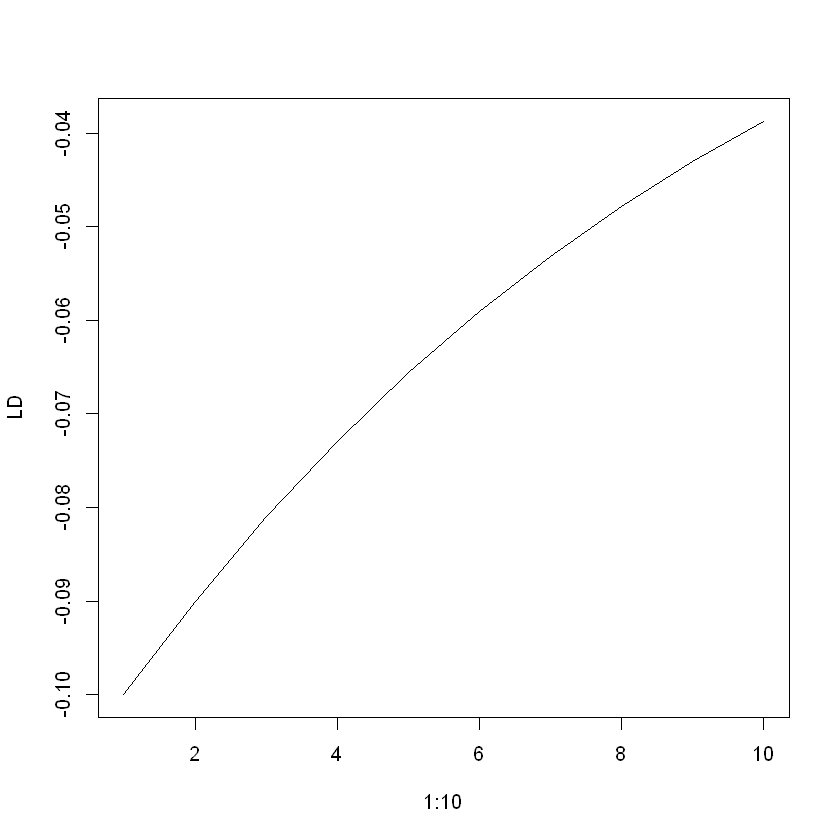

In [9]:
plot (1:10, LD, type = 'l')